In [319]:
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


### Loading and Exploring the Data

In [320]:
delays_df = pd.read_csv(r'data/airlines_delay.csv') # load the dataset

In [321]:
delays_df.shape # show the shape of the dataset (rows, columns)

(539382, 8)

In [322]:
delays_df # show the first and last rows and columns of the dataset

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1


In [323]:
delays_df.info() # show the dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


### Data Cleaning

Cleaning Steps:

In [324]:
#change the column names
delays_df.rename(columns={
    'Flight': 'Flight ID',
    'Time': 'Time of departure',
    'Length': 'Length of Flight',
    'Class': 'Delayed',
}, inplace=True)
delays_df.head(5) # show the first 5 rows of the dataset

,Flight ID,Time of departure,Length of Flight,Airline,AirportFrom,AirportTo,DayOfWeek,Delayed
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [325]:
#convert the Flight column from float to int
delays_df['Flight ID'] = delays_df['Flight ID'].astype(int)
delays_df.head(5)

,Flight ID,Time of departure,Length of Flight,Airline,AirportFrom,AirportTo,DayOfWeek,Delayed
0,2313,1296.0,141.0,DL,ATL,HOU,1,0
1,6948,360.0,146.0,OO,COS,ORD,4,0
2,1247,1170.0,143.0,B6,BOS,CLT,3,0
3,31,1410.0,344.0,US,OGG,PHX,6,0
4,563,692.0,98.0,FL,BMI,ATL,4,0


In [326]:
 # Change Time of departure column from minutes to time value

delays_df['Time of departure'] = pd.to_datetime(delays_df['Time of departure'].map(lambda x: x*60), unit='s').dt.strftime('%H:%M')
delays_df.head(5)

,Flight ID,Time of departure,Length of Flight,Airline,AirportFrom,AirportTo,DayOfWeek,Delayed
0,2313,21:36,141.0,DL,ATL,HOU,1,0
1,6948,06:00,146.0,OO,COS,ORD,4,0
2,1247,19:30,143.0,B6,BOS,CLT,3,0
3,31,23:30,344.0,US,OGG,PHX,6,0
4,563,11:32,98.0,FL,BMI,ATL,4,0


In [327]:
# Change Length of Flight column from float to int
delays_df['Length of Flight'] = delays_df['Length of Flight'].astype(int)
delays_df.head(5)

,Flight ID,Time of departure,Length of Flight,Airline,AirportFrom,AirportTo,DayOfWeek,Delayed
0,2313,21:36,141,DL,ATL,HOU,1,0
1,6948,06:00,146,OO,COS,ORD,4,0
2,1247,19:30,143,B6,BOS,CLT,3,0
3,31,23:30,344,US,OGG,PHX,6,0
4,563,11:32,98,FL,BMI,ATL,4,0


In [328]:
# Change DayofWeek column from numbers to days of the week
delays_df['DayOfWeek'] = delays_df['DayOfWeek'].map({
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
})
delays_df.head(5)

,Flight ID,Time of departure,Length of Flight,Airline,AirportFrom,AirportTo,DayOfWeek,Delayed
0,2313,21:36,141,DL,ATL,HOU,Monday,0
1,6948,06:00,146,OO,COS,ORD,Thursday,0
2,1247,19:30,143,B6,BOS,CLT,Wednesday,0
3,31,23:30,344,US,OGG,PHX,Saturday,0
4,563,11:32,98,FL,BMI,ATL,Thursday,0


### Analyze Data

#### which day of the week has the most delays?

In [329]:
# calculate which day of the week has the most delays
delays_by_day = delays_df.groupby('DayOfWeek')['Delayed'].sum()

# organize the data in descending order
delays_by_day = delays_by_day.sort_values(ascending=False)

print(delays_by_day)

DayOfWeek
Wednesday    42254
Thursday     41244
Friday       35515
Monday       34030
Tuesday      31913
Sunday       31693
Saturday     23615
Name: Delayed, dtype: int64


##### which Airline has the most delays?

In [330]:
# calculate the number of Delayed flights per Airline
delays_by_airline = delays_df.groupby('Airline')['Delayed'].sum()

# organize the data in descending order
delays_by_airline = delays_by_airline.sort_values(ascending=False)

print(delays_by_airline)

Airline
WN    65657
DL    27452
OO    22760
AA    17736
MQ    12742
CO    11957
XE    11795
US    11591
EV    11255
UA     8946
B6     8459
9E     8226
FL     6275
AS     3892
OH     3502
YV     3334
F9     2899
HA     1786
Name: Delayed, dtype: int64


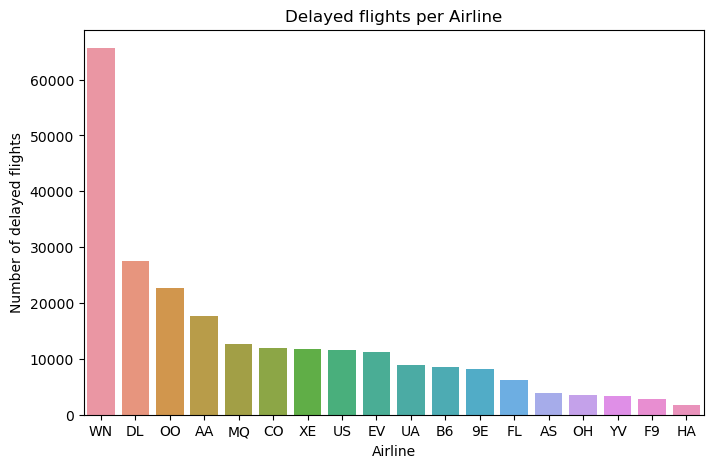

In [331]:
# plot delayed flights per airline
plt.figure(figsize=(8, 5))
sns.barplot(x=delays_by_airline.index, y=delays_by_airline.values)
plt.title('Delayed flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of delayed flights')
plt.show()